# Unsupervised data mining

# SVD and NMF(non negative matrix factorization) for data mining

# Application
- Clustering.
- Recommendation system(Book, movies).
- Topics modeling.

Let's try some topics modelling via SVD

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/Singular-Value-Decomposition.svg"> </img>

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
news_group_dataset = fetch_20newsgroups(remove=['headers', 'footers', 'quotes'])

In [3]:
print(news_group_dataset.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [4]:
news_group_dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
news_group_dataset.filenames.shape, news_group_dataset.target.shape

((11314,), (11314,))

Let's see some content

In [6]:
print(news_group_dataset.data[3000])



That's why the Zionists decided that Zion must be Gentile-rein.
What?!  They didn't?!  You mean to tell me that the early Zionists
actually granted CITIZENSHIP in the Jewish state to Christian and
Muslim people, too?  

It seems, Elias, that your "first point to note" is wrong, so the rest
of your posting isn't worth much, either.

Ta ta...



In [7]:
news_group_dataset.target[3000]

17

In [8]:
news_group_dataset.target_names[17]

'talk.politics.mideast'

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vectors_transformer = CountVectorizer(stop_words='english', max_features=1000)

In [14]:
count_vectors_transformer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
count_vectors_transformer.fit(news_group_dataset.data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
doc_count_vectors= count_vectors_transformer.transform(news_group_dataset.data)

In [17]:
doc_count_vectors

<11314x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 286250 stored elements in Compressed Sparse Row format>

In [18]:
doc_count_vectors.toarray().shape

(11314, 1000)

In [19]:
count_vectors_transformer.vocabulary_

{'oh': 644,
 'data': 280,
 'higher': 453,
 'author': 141,
 'sci': 794,
 'bh': 159,
 'board': 169,
 'orbit': 651,
 'entry': 345,
 'cause': 201,
 'sounds': 840,
 'law': 526,
 'jesus': 499,
 'long': 552,
 'groups': 429,
 'wm': 976,
 'greek': 426,
 'ac': 82,
 'defense': 292,
 'bought': 173,
 'current': 275,
 'god': 417,
 'articles': 133,
 'white': 967,
 'government': 423,
 'south': 843,
 'dead': 288,
 'simply': 823,
 'new': 625,
 'calls': 190,
 'bike': 163,
 'taken': 875,
 'keys': 510,
 'believe': 156,
 'basic': 152,
 'trouble': 911,
 'contains': 256,
 'dr': 324,
 'figure': 378,
 'tax': 882,
 'alt': 103,
 'common': 242,
 'job': 503,
 'command': 239,
 'land': 520,
 'launch': 525,
 '3t': 55,
 'mr': 612,
 'output': 657,
 'distribution': 315,
 'thanks': 893,
 'mark': 578,
 'test': 890,
 'care': 196,
 'reported': 761,
 'posted': 701,
 'appropriate': 120,
 'tv': 920,
 'jpeg': 506,
 'basically': 153,
 'perfect': 671,
 'road': 775,
 'final': 381,
 'american': 105,
 'israel': 495,
 'air': 98,
 'hel

In [20]:
U, E, VT = linalg.svd(doc_count_vectors.toarray(), full_matrices=False)

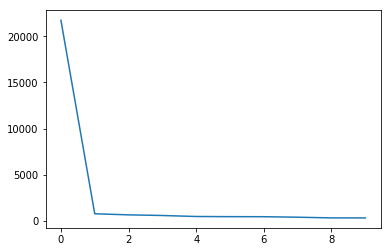

In [22]:
plt.plot(E[0:10])

In [23]:
voc = count_vectors_transformer.get_feature_names()

In [26]:
voc

['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '0d',
 '0t',
 '10',
 '100',
 '11',
 '12',
 '128',
 '13',
 '14',
 '145',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1990',
 '1991',
 '1992',
 '1993',
 '1d9',
 '1st',
 '1t',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '2di',
 '2tm',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '34u',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '3t',
 '40',
 '42',
 '43',
 '44',
 '45',
 '50',
 '500',
 '55',
 '60',
 '64',
 '6ei',
 '70',
 '75',
 '75u',
 '7ey',
 '7u',
 '80',
 '800',
 '86',
 '90',
 '91',
 '92',
 '93',
 '9v',
 'a86',
 'able',
 'ac',
 'accept',
 'access',
 'according',
 'act',
 'action',
 'actually',
 'add',
 'addition',
 'address',
 'administration',
 'advance',
 'age',
 'ago',
 'agree',
 'ah',
 'air',
 'al',
 'algorithm',
 'allow',
 'allowed',
 'alt',
 'america',
 'american',
 'analysis',
 'anonymous',
 'answer',
 'answers',
 'anti',
 'anybody',
 'apparently',
 'appears',
 'apple',
 'application',
 'applications',
 

In [28]:
U.shape, VT.shape

((11314, 1000), (1000, 1000))

In [40]:
for v in VT[:10]:
    print(v.shape)
    top_words = ' '.join( [voc[i] for i in np.argsort(v)[:-10: -1]] )
    print(v[np.argsort(v)[:-10: -1]])
    print(top_words)
    

(1000,)
[-3.07577292e-10 -3.67810993e-10 -3.97026738e-10 -4.36610430e-10
 -4.53964483e-10 -5.12723918e-10 -5.33957411e-10 -6.04882264e-10
 -6.09569952e-10]
moral nsa atheism escrow christianity appreciate appreciated religious btw
(1000,)
[ 2.76884390e-02  1.95724992e-02 -4.57664234e-05 -4.76035169e-05
 -5.07710385e-05 -5.34035676e-05 -7.19442459e-05 -7.20598616e-05
 -7.30414584e-05]
ax max btw deleted appreciate bike appreciated sounds oh
(1000,)
[0.31699328 0.23745577 0.17198464 0.14554527 0.12463206 0.12155089
 0.12111494 0.11782868 0.11575021]
file edu use available program com information pub people
(1000,)
[0.94842894 0.20818721 0.14433914 0.08693159 0.0780793  0.0619164
 0.02224599 0.02023107 0.01994162]
db bh cs al cx bits ah gas lower
(1000,)
[0.21046869 0.14637542 0.14337784 0.1298935  0.1282227  0.11691754
 0.11648558 0.1089126  0.10241469]
145 0t 14 pl 10 34u 16 b8f 17
(1000,)
[0.14547449 0.14176602 0.12963497 0.11614885 0.11224382 0.10829779
 0.10520066 0.10253258 0.092661

# Some of the issues with SVD
- Hard to interpret negative
- Dense vectors

# NMF
- Vectors need not be orthogonal

In NMF we factorize non negative matrix $M$ into two non- negative metrics $W$ and $H$ as $$A=WH$$

Entries in $W, H$ are non negative and easy to interpret.

<font color = "red"> NMF is NP-hard and non-unique. Different constrained create different variations.</font> 

TO find the factors one minimize the  frobenious norm of  $A- WH$ s.t. $W, H \succcurlyeq 0 $
 

# Resources
- [Introduction to Information Retrieval](https://nlp.stanford.edu/IR-book/)
- [The Why and How of Nonnegative Matrix Factorization](https://arxiv.org/pdf/1401.5226.pdf)
- [Tf-idf] (https://en.wikipedia.org/wiki/Tf%E2%80%93idf)